In [4]:
import os
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor

In [5]:
#First let’s add the Python code to change directories – I was doing this using the Spyder GUI before 
#which is a bit lazy.

path = "C:\Work\Machine Learning experiments\Kaggle\House Price"
os.chdir(path)

In [7]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [8]:
#Let’s get our bearings by running some .head and .describe() commands on the training set and see 
#that we spot:

train_data.head(n=20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
#We’ve certainly got lots of columns to work with – each row represents a sale, most of the 
#columns describe the property itself, but over to the right we’ve also got some info on the 
#sale (year sold, sale type, sale condition, etc.), and importantly – the variable we will be
#trying to predict – the sale price.

#Next let’s try the .describe command:

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='Neighborhood'>

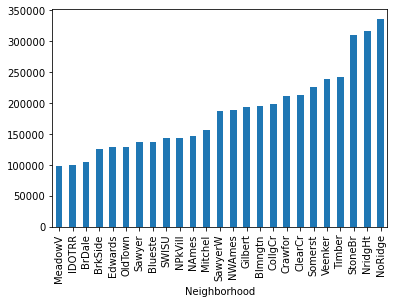

In [10]:
#Let’s pick out a few important features of the above – we’ve for 1460 rows, each row has a sale 
# price – so far so good. The average sale price is $ 180,921. House prices in Iowa cira 2007 
# are certainly a lot lower than London! We can read off the min and max house price – 35k, and 
# 750k respectively. In order to start to build up some intuition around the dataset, let’s start
# to pick out some variables we think will be useful and graph them against house price:

#Let’s start with neighbourhood:
#First we need to pivot on Neighbourhood, sort by sales price, and then produce a bar chart:


NeighbourhoodPivot = train_data.groupby("Neighborhood")['SalePrice'].mean()
NeighbourhoodPivot = NeighbourhoodPivot.sort_values()
NeighbourhoodPivot.plot.bar()

<AxesSubplot:xlabel='OverallQual'>

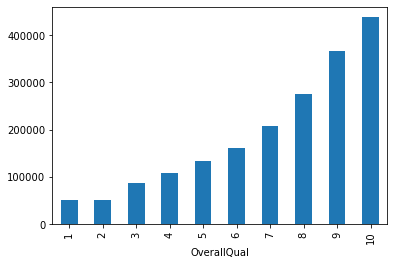

In [11]:
#The built-in .plot functionality is definitely not the prettiest, but at least it seems to work
# well straight out of the box. I’ve used Seaborn in the past, but since this is just a rough first 
# cut, let’s not go to the effort right now just for the sake of appearance.

#So what can we deduce from the chart? We see that Neighbourhood is clearly going to be useful – 
# NoRidge has an average sale price almost double that of the average across our entire dataset,
# MedaowV has an average almost half of the whole population. We’ll definitely want to include 
# this in our modelling.

#Let’s repeat the above with a few more variables, just eyeballing the list of variables, I like 
# the look of OverallQuality, OverallCondition, BuildingType, Housestyle, and YearSold


#Overall Quality:


OverallQualPivot = train_data.groupby("OverallQual")['SalePrice'].mean().sort_values()
OverallQualPivot.plot.bar()

<AxesSubplot:xlabel='OverallCond'>

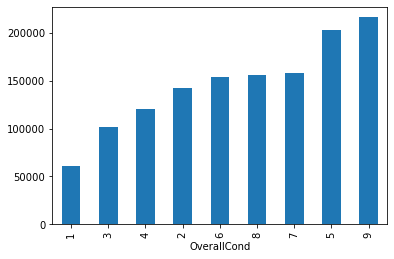

In [12]:
OverallCondPivot = train_data.groupby("OverallCond")['SalePrice'].mean().sort_values()
OverallCondPivot.plot.bar()

<AxesSubplot:xlabel='BldgType'>

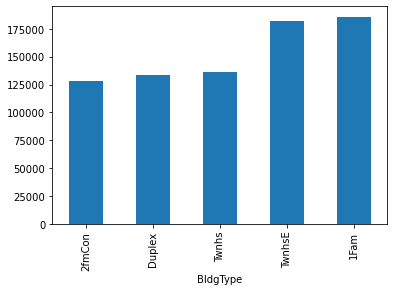

In [13]:
BldgTypePivot = train_data.groupby("BldgType")['SalePrice'].mean().sort_values()
BldgTypePivot.plot.bar()

<AxesSubplot:xlabel='HouseStyle'>

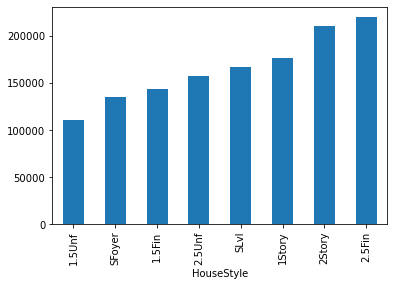

In [14]:
HouseStylePivot = train_data.groupby("HouseStyle")['SalePrice'].mean().sort_values()
HouseStylePivot.plot.bar()

<AxesSubplot:xlabel='YrSold'>

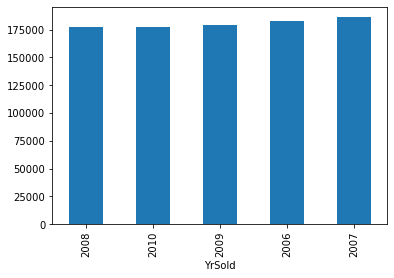

In [15]:
YrSoldPivot = train_data.groupby("YrSold")['SalePrice'].mean().sort_values()
YrSoldPivot.plot.bar()

In [16]:

#Okay – we’ve done some data exploration, and there are clearly some useful variables in our dataset.

#Building a model:
#We want to build a supervised regression model – since we had so much success with Random Forests 
# last time, I’m going to just use that this time – we’re going to only use the variables above that
# used useful and we’re not going to amend any data or tweak and hyperparameters – just to give 
# ourselves a naïve benchmark so reference against. The following is just code which I’ve taken from 
# the Titanic competition and amended to work here:


features = ['Neighborhood','OverallQual','OverallCond','BldgType','HouseStyle']
Y = train_data['SalePrice']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

columns = X.columns
ColList = columns.tolist()


missing_cols = set( X_test.columns ) - set( X.columns )
missing_cols2 = set( X.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X[c] = 0
    
for c in missing_cols2:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X = X[X_test.columns]

In [17]:
RFmodel = RandomForestRegressor(random_state=1)
RFmodel.fit(X,Y)
predictions = RFmodel.predict(X_test)


In [ ]:
output = pd.DataFrame({'ID': test_data.Id, 'SalePrice': predictions})
output.to_csv('my_submission - V1 - RF.csv',index=False)